In [4]:
# Import necessary libraries
import pandas as pd

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing

In [7]:
import pandas as pd
import zipfile
from io import BytesIO
import requests

# URL to the ZIP file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"

# Download the ZIP file
response = requests.get(url)
with zipfile.ZipFile(BytesIO(response.content), 'r') as zip_file:
    # Extract the CSV file from the ZIP archive
    csv_filename = 'bank-additional/bank-additional-full.csv'
    with zip_file.open(csv_filename) as file:
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file, sep=';')

# Display the first few rows of the DataFrame
print(df.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [8]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn import preprocessing
from io import BytesIO
from zipfile import ZipFile
import requests

# Load the dataset from the URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
response = requests.get(url)
with ZipFile(BytesIO(response.content)) as zip_file:
    with zip_file.open('bank-additional/bank-additional-full.csv') as file:
        df = pd.read_csv(file, sep=';')

# Convert categorical variables to numerical using label encoding
le = preprocessing.LabelEncoder()
df['job'] = le.fit_transform(df['job'])
df['marital'] = le.fit_transform(df['marital'])
df['education'] = le.fit_transform(df['education'])
df['default'] = le.fit_transform(df['default'])
df['housing'] = le.fit_transform(df['housing'])
df['loan'] = le.fit_transform(df['loan'])
df['contact'] = le.fit_transform(df['contact'])
df['month'] = le.fit_transform(df['month'])
df['day_of_week'] = le.fit_transform(df['day_of_week'])
df['poutcome'] = le.fit_transform(df['poutcome'])
df['y'] = le.fit_transform(df['y'])

# Split the data into features and target
X = df.drop('y', axis=1)
y = df['y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7303
           1       0.51      0.51      0.51       935

    accuracy                           0.89      8238
   macro avg       0.73      0.73      0.73      8238
weighted avg       0.89      0.89      0.89      8238



In [9]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [10]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,5,1,5,0,2,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,...,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,...,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41187,74,5,1,5,0,2,0,0,7,0,...,3,999,1,0,-1.1,94.767,-50.8,1.028,4963.6,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int32  
 2   marital         41188 non-null  int32  
 3   education       41188 non-null  int32  
 4   default         41188 non-null  int32  
 5   housing         41188 non-null  int32  
 6   loan            41188 non-null  int32  
 7   contact         41188 non-null  int32  
 8   month           41188 non-null  int32  
 9   day_of_week     41188 non-null  int32  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int32  
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,3.72458,1.172769,3.747184,0.208872,1.071720,0.327425,0.365252,4.230868,2.004613,...,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,2.136482,0.406686,0.985314,0.723616,0.481507,2.320025,1.397575,...,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,0.00000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,2.00000,1.000000,3.000000,0.000000,2.000000,0.000000,0.000000,4.000000,2.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,7.00000,2.000000,6.000000,0.000000,2.000000,0.000000,1.000000,6.000000,3.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,11.00000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,...,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [14]:
df.shape

(41188, 21)

In [15]:
df.nunique().sort_values(ascending=True)

y                    2
contact              2
default              3
housing              3
loan                 3
poutcome             3
marital              4
day_of_week          5
education            8
previous             8
emp.var.rate        10
month               10
nr.employed         11
job                 12
cons.price.idx      26
cons.conf.idx       26
pdays               27
campaign            42
age                 78
euribor3m          316
duration          1544
dtype: int64

In [16]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [17]:
df.duplicated().any()

True

In [18]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [20]:
y=df["marital"]

In [21]:
y

0        1
1        1
2        1
3        1
4        1
        ..
41183    1
41184    1
41185    1
41186    1
41187    1
Name: marital, Length: 41188, dtype: int32

<Axes: xlabel='marital'>

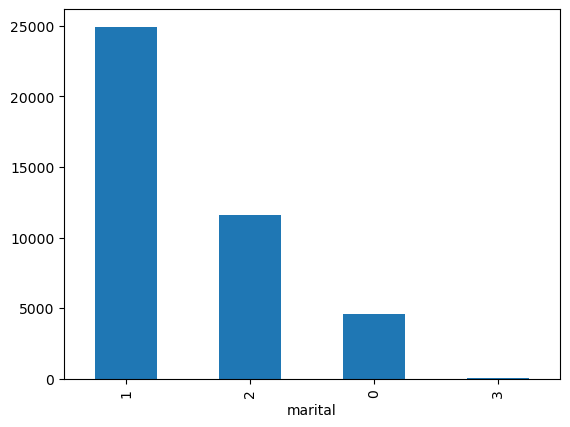

In [22]:
df['marital'].value_counts().plot(kind='bar')

In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [24]:
x=df.drop(columns=['marital'],axis=1)

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
x=x.apply(LabelEncoder().fit_transform)

In [26]:
x.corr()

,age,job,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.001235,-0.117894,0.164971,-0.001605,-0.007377,0.007054,-0.024927,-0.017570,-0.000309,0.004689,-0.037330,0.024291,0.019727,0.002254,-0.006061,0.127919,-0.048040,-0.025658,0.030339
job,0.001235,1.000000,0.134121,-0.028277,0.006962,-0.010209,-0.025132,-0.033213,-0.000844,-0.006320,-0.006848,-0.028074,0.020965,0.011504,-0.003618,-0.016589,0.057135,-0.024999,-0.021910,0.025122
education,-0.117894,0.134121,1.000000,-0.186859,0.016825,0.006384,-0.105726,-0.082684,-0.017986,-0.015364,0.000196,-0.046559,0.038831,0.017009,-0.027874,-0.081128,0.084738,-0.057508,-0.036666,0.057799
default,0.164971,-0.028277,-0.186859,1.000000,-0.015815,-0.003782,0.135238,-0.015830,-0.008701,-0.011487,0.032753,0.078405,-0.102416,0.023417,0.188923,0.165436,0.020473,0.192971,0.175014,-0.099352
housing,-0.001605,0.006962,0.016825,-0.015815,1.000000,0.044296,-0.082186,-0.018141,0.003339,-0.008986,-0.011080,-0.011882,0.021314,-0.011783,-0.055973,-0.078742,-0.028543,-0.041340,-0.036002,0.011552
loan,-0.007377,-0.010209,0.006384,-0.003782,0.044296,1.000000,-0.008556,-0.005705,-0.009344,-0.002329,0.005043,-0.000615,-0.001327,-0.001511,0.001298,-0.001966,-0.011559,0.005135,0.005483,-0.004909
contact,0.007054,-0.025132,-0.105726,0.135238,-0.082186,-0.008556,1.000000,0.276565,-0.009575,-0.031278,0.077398,0.116108,-0.212848,0.118744,0.350211,0.584524,0.243212,0.273937,0.175940,-0.144773
month,-0.024927,-0.033213,-0.082684,-0.015830,-0.018141,-0.005705,0.276565,1.000000,0.027677,0.004023,-0.062415,-0.047419,0.103157,-0.065012,-0.188273,-0.006372,-0.018749,-0.197147,-0.266983,-0.006065
day_of_week,-0.017570,-0.000844,-0.017986,-0.008701,0.003339,-0.009344,-0.009575,0.027677,1.000000,0.024923,-0.038318,-0.010467,-0.004102,0.018732,0.035915,0.002174,0.035237,0.023488,0.023271,0.015967
duration,-0.000309,-0.006320,-0.015364,-0.011487,-0.008986,-0.002329,-0.031278,0.004023,0.024923,1.000000,-0.076564,-0.047820,0.023955,0.034275,-0.033560,0.002990,-0.008391,-0.044162,-0.052959,0.419889


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

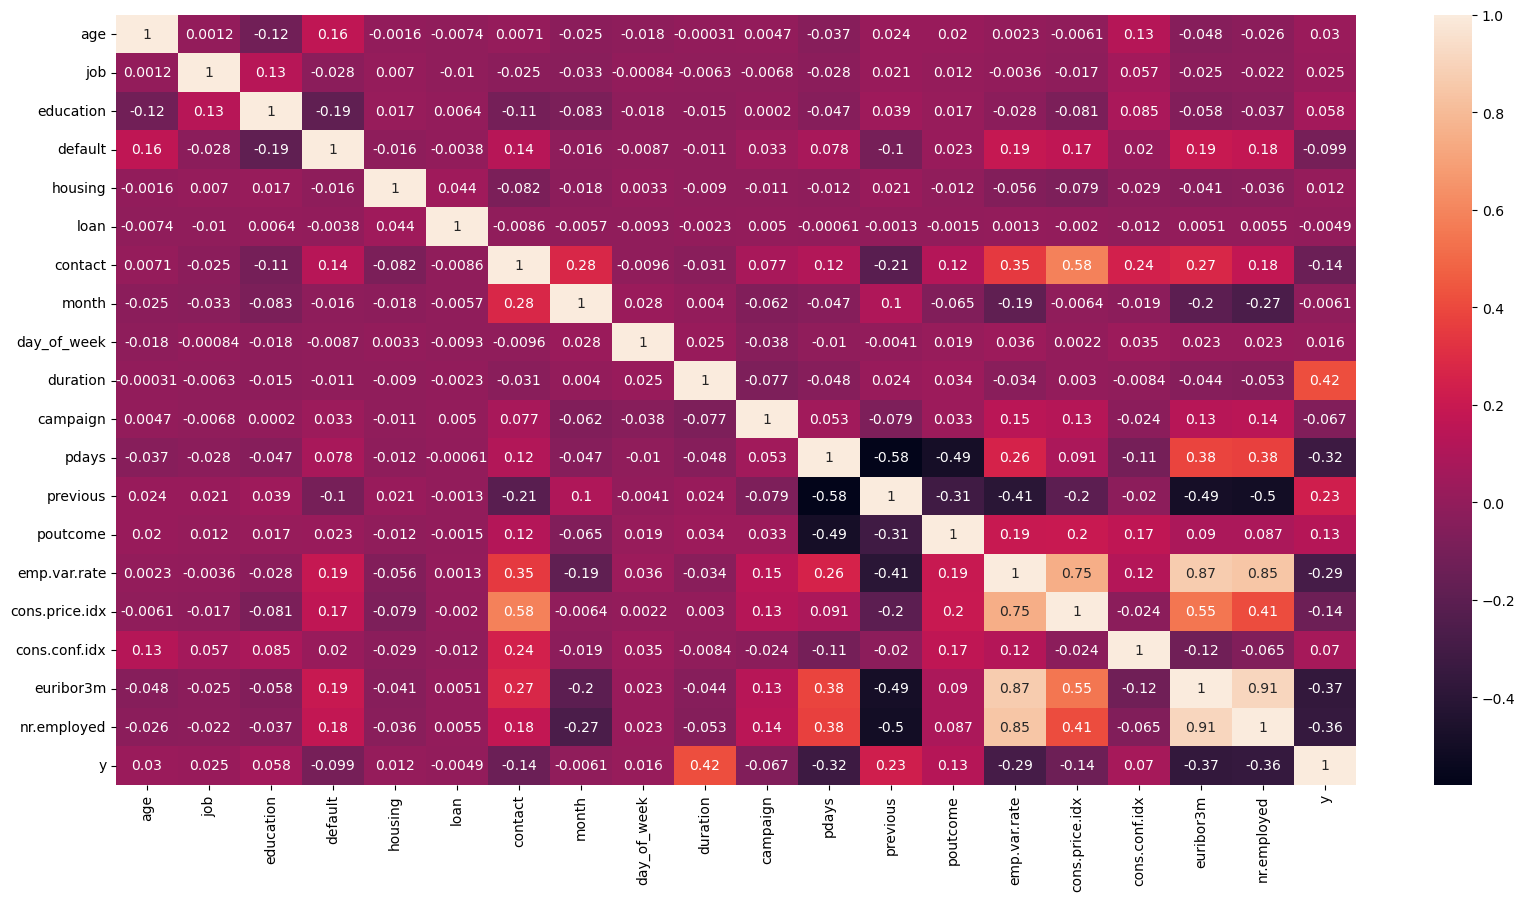

In [29]:
plt.figure(figsize=(20, 10))
sns.heatmap(x.corr(), annot=True)
plt.show()

In [30]:
from sklearn.decomposition import PCA
pca1= PCA(n_components=0.50)
pca_fit=pca1.fit_transform(x)

In [31]:
pca1.explained_variance_ratio_

array([0.92030642])

In [32]:
sum(pca1.explained_variance_ratio_)

0.92030642408823

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=123,stratify=y)

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
dt=DecisionTreeClassifier()

In [37]:
dt=DecisionTreeClassifier(criterion='entropy')

In [38]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [39]:
y_pred=dt.predict(x_test)
y_pred_train = dt.predict(x_train)

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [41]:
confusion_matrix(y_test,y_pred)

array([[ 351,  790,  242,    1],
       [ 888, 5122, 1454,   15],
       [ 244, 1424, 1795,    7],
       [   2,   17,    4,    1]], dtype=int64)

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.24      0.25      0.24      1384
           1       0.70      0.68      0.69      7479
           2       0.51      0.52      0.52      3470
           3       0.04      0.04      0.04        24

    accuracy                           0.59     12357
   macro avg       0.37      0.37      0.37     12357
weighted avg       0.59      0.59      0.59     12357



In [43]:
accuracy_score(y_test,y_pred)*100

58.824957513959696

In [44]:
accuracy_score(y_train, y_pred_train)*100

100.0

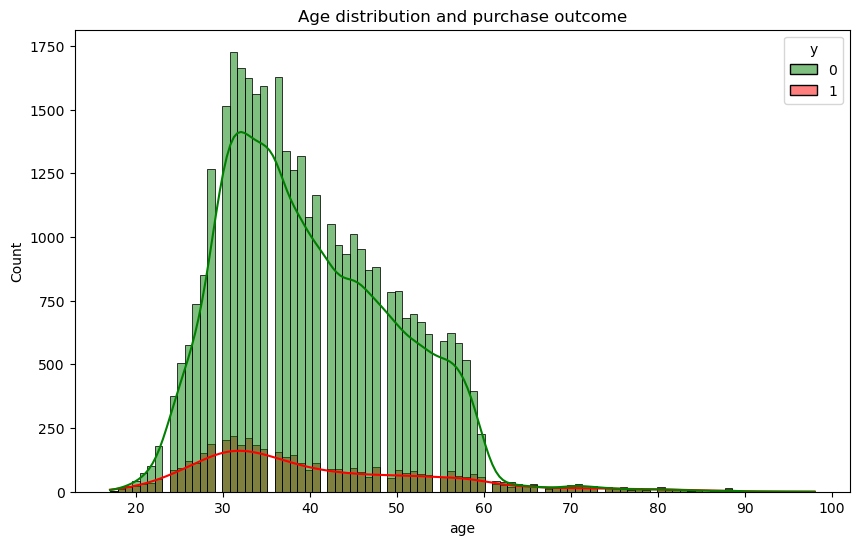

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(x="age", data=df, kde=True, hue="y", palette=["green", "red"])
plt.title("Age distribution and purchase outcome")
plt.show()

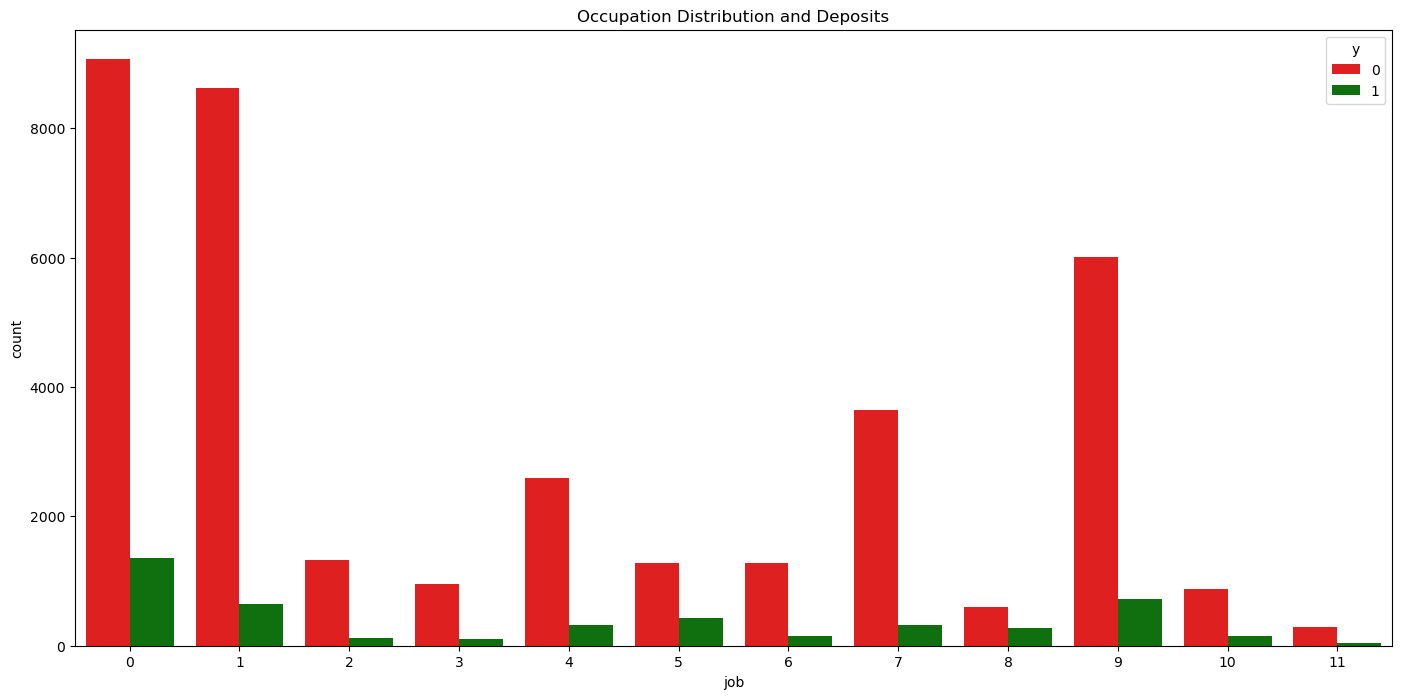

In [51]:
plt.figure(figsize=(17, 8))
sns.countplot(x="job", data=df, hue="y", palette=["red", "green"])
plt.title("Occupation Distribution and Deposits")
plt.show()

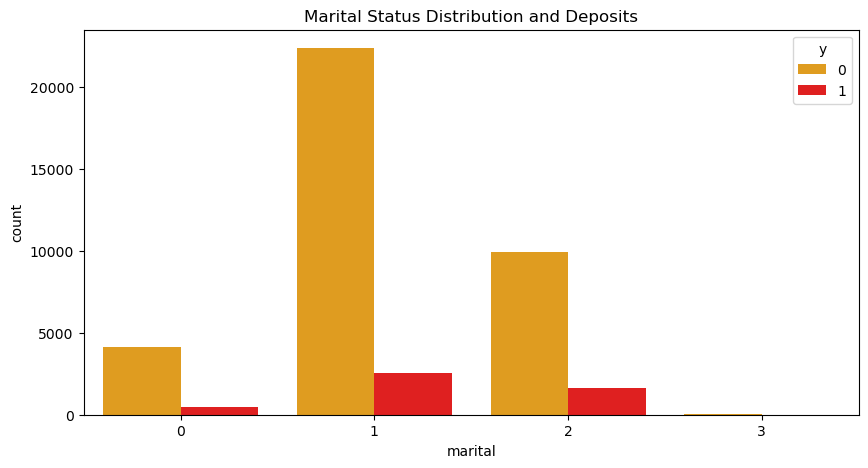

In [54]:
plt.figure(figsize=(10, 5))
sns.countplot(x="marital", data=df, hue="y", palette=["orange", "red"])
plt.title("Marital Status Distribution and Deposits")
plt.show()

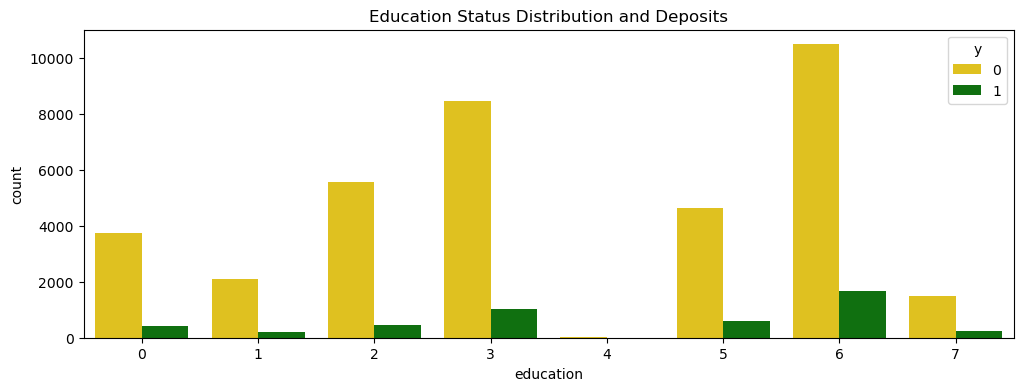

In [56]:
plt.figure(figsize=(12, 4))
sns.countplot(x="education", data=df, hue="y", palette=["gold", "green"])
plt.title("Education Status Distribution and Deposits")
plt.show()

In [58]:
default_counts = df['default'].value_counts()
print(default_counts)

default
0    32588
1     8597
2        3
Name: count, dtype: int64


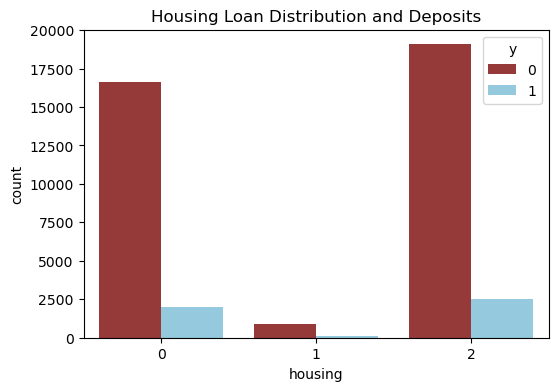

In [61]:
plt.figure(figsize=(6, 4))
sns.countplot(x="housing", data=df, hue="y", palette=["brown", "skyblue"])
plt.title("Housing Loan Distribution and Deposits")
plt.show()

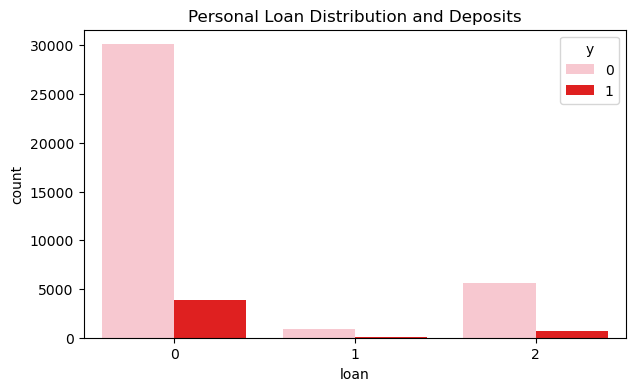

In [64]:
plt.figure(figsize=(7, 4))
sns.countplot(x="loan", data=df, hue="y", palette=["pink", "red"])
plt.title("Personal Loan Distribution and Deposits")
plt.show()

Outcome Counts:
0: 36548
1: 4640


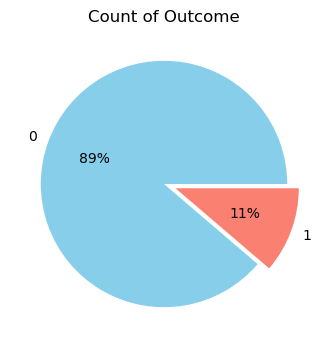

In [67]:
# Assuming you have a DataFrame 'df'
# Count of Outcome
counts = df['y'].value_counts()
keys = counts.index
data = counts.values

print("Outcome Counts:")
for key, value in zip(keys, data):
    print(f"{key}: {value}")
    # Custom colors for the pie chart
colors = ['skyblue', 'salmon']

# Create the pie chart with custom colors
plt.figure(figsize=(8, 4))
explode = [0, 0.1]
plt.pie(data, labels=keys, explode=explode, autopct='%.0f%%', colors=colors)

# Add title
plt.title('Count of Outcome')

# Show the plot
plt.show()

In [69]:
cols = df.select_dtypes("object").columns
print(cols)

Index([], dtype='object')


In [71]:
le = LabelEncoder()
cols = df.select_dtypes("object").columns
df[cols] = df[cols].apply(le.fit_transform)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [79]:
# Label Encoding Categorical Features
le = LabelEncoder()
cols = df.select_dtypes("object").columns
df[cols] = df[cols].apply(le.fit_transform)

# Splitting input and output
X = df.drop("y", axis=1)
y = df.y

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)


In [80]:
# Describe the scaled features
description = X_scaled.describe()
print(description)

                age           job       marital     education       default  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -1.880382e-16 -6.382947e-17 -2.708440e-17 -5.382377e-17 -6.624464e-17   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00  1.000012e+00   
min   -2.209365e+00 -1.036184e+00 -1.926061e+00 -1.753925e+00 -5.135997e-01   
25%   -7.699804e-01 -1.036184e+00 -2.837415e-01 -8.177951e-01 -5.135997e-01   
50%   -1.942267e-01 -4.797808e-01 -2.837415e-01 -3.497303e-01 -5.135997e-01   
75%    6.694038e-01  9.112268e-01  1.358578e+00  1.054464e+00 -5.135997e-01   
max    5.563310e+00  2.024033e+00  3.000897e+00  1.522529e+00  4.404253e+00   

            housing          loan       contact         month   day_of_week  \
count  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04  4.118800e+04   
mean  -7.072995e-18  7.081621e-17 -1.104077e-17  7.038493e-17 -3.993655e-17   
std    1.000012e+00  1.000012e+00  1.000012e+00  1.

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
pred_y = clf.predict(X_test)


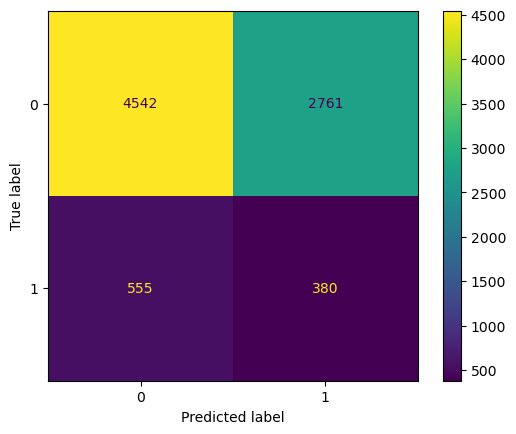

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have pred_y (predicted labels) and y_test (true labels)
cm = confusion_matrix(y_test, pred_y)
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()
plt.show()

In [86]:
from sklearn.metrics import classification_report
# Assuming you have pred_y and y_test from the previous steps
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.89      0.62      0.73      7303
           1       0.12      0.41      0.19       935

    accuracy                           0.60      8238
   macro avg       0.51      0.51      0.46      8238
weighted avg       0.80      0.60      0.67      8238



In [88]:
from sklearn.metrics import accuracy_score
# Assuming you have pred_y and y_test from the previous steps
accuracy = accuracy_score(y_test, pred_y)
print("Test Accuracy of Decision Tree Classifier: {:.2%}".format(accuracy))

Test Accuracy of Decision Tree Classifier: 59.75%
